In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('dataset/Zameen Property Data.csv')

In [3]:
from pre_poccess import pre_poccess
    

pp_data = pre_poccess(data)

C:\Users\Faraz Ahmed Khan\OneDrive - Habib University\semester 7\DS\final_project\final\Zameen-Data-exploratory-Analysis\pre_poccess.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['agency'][dataset['agency'].isnull()] = 'Individual'
C:\Users\Faraz Ahmed Khan\OneDrive - Habib University\semester 7\DS\final_project\final\Zameen-Data-exploratory-Analysis\pre_poccess.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_z_score'] = 0
C:\Users\Faraz Ahmed Khan\OneDrive - Habib University\semester 7\DS\final_project\final\Zameen-Data-explorator

pre-poccessed successfully.


C:\Users\Faraz Ahmed Khan\OneDrive - Habib University\semester 7\DS\final_project\final\Zameen-Data-exploratory-Analysis\pre_poccess.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_z_score'][dataset['purpose'] == 'For Rent'] = z_score


In [9]:
print(pp_data.head(5))

  property_type     price     location       city      province_name  \
0          Flat  10000000         G-10  Islamabad  Islamabad Capital   
1          Flat   6900000         E-11  Islamabad  Islamabad Capital   
2         House  16500000         G-15  Islamabad  Islamabad Capital   
3         House  43500000    Bani Gala  Islamabad  Islamabad Capital   
4         House   7000000  DHA Defence  Islamabad  Islamabad Capital   

    latitude  longitude  baths    area   purpose  bedrooms  date_added  \
0  33.679890  73.012640      2  2000.0  For Sale         2  02-04-2019   
1  33.700993  72.971492      3  2800.0  For Sale         3  05-04-2019   
2  33.631486  72.926559      6  4000.0  For Sale         5  07-17-2019   
3  33.707573  73.151199      4    50.0  For Sale         4  04-05-2019   
4  33.492591  73.301339      3  4000.0  For Sale         3  07-10-2019   

          agency                                         agent  \
0     Individual                                        

###Q2
Analyzing the recovery period of rent with respect to the selling price of a property

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


##checking if data contains any anaomly 
print(pp_data['purpose'].value_counts())

# Share a Y axis with each row of subplots
fig, ax = plt.subplots(1, 2, figsize = (15, 7))

sns.kdeplot(np.log(pp_data['price_per_area'][pp_data['purpose'] == 'For Sale']), shade = True, ax = ax[0], label = "Sale")
sns.kdeplot(np.log(pp_data['price_per_area'][pp_data['purpose'] == 'For Rent']), shade = True, ax = ax[1], label = "Rent")
ax[0].set_xlabel("Logged Price (In PKR)")
ax[1].set_xlabel("Logged Price (In PKR)")
ax[0].grid();ax[1].grid();
plt.show()

For Sale    104408
For Rent     37577
Name: purpose, dtype: int64


<Figure size 1500x700 with 2 Axes>

There appears to be a clear relation between both prices. Both follow a bimodal distribution.

In [6]:
location_sale_rent = {}
for i, row in pp_data.iterrows():
    location = row['unique_location'].strip().lower()
    price_per_area = row['price_per_area']
    purpose = row['purpose']
    if location not in location_sale_rent:
        location_sale_rent[location] = {'For Sale':[], 'For Rent':[]}
    location_sale_rent[location][purpose].append(price_per_area)

In [7]:
print(len(location_sale_rent))
mean_loc_sale_rent = {}

for i in location_sale_rent:
    for_sale = location_sale_rent[i]['For Sale']
    for_rent = location_sale_rent[i]['For Rent']
    if (len(for_sale) + len(for_rent)) >= 0 and len(for_sale) > 0 and len(for_rent) > 0:
        if i not in mean_loc_sale_rent:
            mean_loc_sale_rent[i] = {'sale': 0, 'rent' : 0, 'city':''}
        mean_loc_sale_rent[i]['sale'] = np.mean(for_sale)
        mean_loc_sale_rent[i]['rent'] = np.mean(for_rent)
        mean_loc_sale_rent[i]['city'] = i.split()[-1].capitalize()
            
print(len(mean_loc_sale_rent))
mean_location = pd.DataFrame.from_dict(mean_loc_sale_rent, orient = 'index')
mean_location['ratio_per_month'] = np.floor(mean_location['sale'] / mean_location['rent'], dtype = 'float64')
mean_location['ratio_per_year'] = (mean_location['ratio_per_month']/12)



mean_location.head(10)

1549
552


,sale,rent,city,ratio_per_month,ratio_per_year
g-10 islamabad,199485.975250,814.000339,Islamabad,245.0,20.416667
e-11 islamabad,302345.718713,1402.143998,Islamabad,215.0,17.916667
g-15 islamabad,115130.115219,403.183141,Islamabad,285.0,23.750000
bani gala islamabad,440242.454674,1144.963192,Islamabad,384.0,32.000000
dha defence islamabad,583251.698762,1527.425841,Islamabad,381.0,31.750000
ghauri town islamabad,7530.445888,21.082755,Islamabad,357.0,29.750000
korang town islamabad,170562.830868,423.422511,Islamabad,402.0,33.500000
f-11 islamabad,568685.615308,2620.772169,Islamabad,216.0,18.000000
diplomatic enclave islamabad,11360.661513,123.396055,Islamabad,92.0,7.666667
b-17 islamabad,98441.931833,455.631409,Islamabad,216.0,18.000000


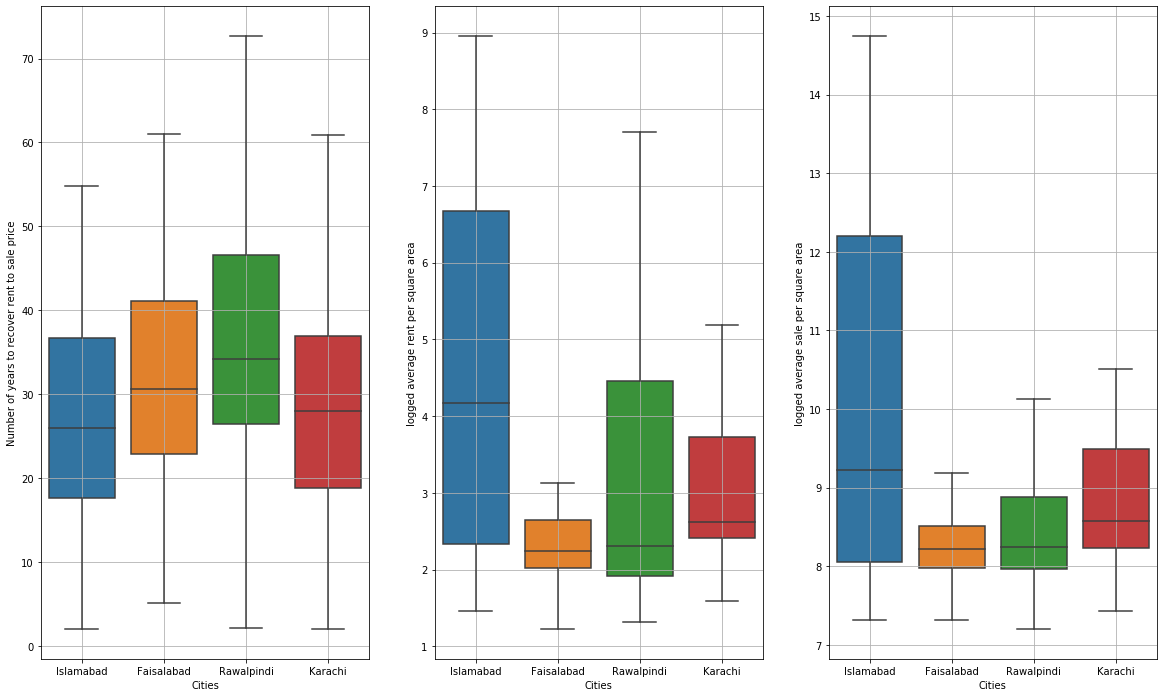

In [8]:
mean_location = mean_location.drop(mean_location[(mean_location['ratio_per_year'] < 2) | (mean_location['ratio_per_year'] > 80)].index)


fig, ax = plt.subplots(1, 3,figsize = (20, 12))
sns.boxplot(y = 'ratio_per_year', x = 'city', data = mean_location, showfliers=False, ax = ax[0])
ax[0].set_xlabel('Cities')
ax[0].set_ylabel("Number of years to recover rent to sale price")
ax[0].grid()

sns.boxplot(y = np.log(mean_location['rent']), x = mean_location['city'], showfliers=False, ax = ax[1])
ax[1].set_xlabel('Cities')
ax[1].set_ylabel("logged average rent per square area")
ax[1].grid()

sns.boxplot(y = np.log(mean_location['sale']), x = mean_location['city'], showfliers=False, ax = ax[2])
ax[2].set_xlabel('Cities')
ax[2].set_ylabel("logged average sale per square area")
ax[2].grid()

plt.show()


